# Optimizadores en Redes Neuronales

 En este notebook exploraremos uno de los componentes más importantes en el entrenamiento de redes neuronales: **los optimizadores**. Estos algoritmos son esenciales para ajustar los pesos y sesgos de las redes neuronales, minimizando la función de pérdida y mejorando el rendimiento del modelo.

## ¿Qué aprenderás?
En este notebook, entenderás:
- Qué es un optimizador y por qué es fundamental en el aprendizaje automático.
- Cómo funciona el **Descenso de Gradiente Estocástico (SGD)** y sus variantes.
- Qué características tiene el **Optimizador Adam** y cómo se compara con otros algoritmos.
- Cómo evaluar y comparar optimizadores utilizando un conjunto de datos.

## ¿Qué dataset utilizaremos?
Trabajaremos con el dataset **Fashion-MNIST**, que incluye 70,000 imágenes en escala de grises, cada una de tamaño 28x28 píxeles, divididas en 10 categorías de ropa y accesorios como:
- Camisetas/Top (0)
- Pantalones (1)
- Sudaderas (2)
- Zapatos (7 y 9, según el tipo)
- Bolsos (8)

Este dataset es ideal porque es desafiante, ampliamente usado en tareas de aprendizaje profundo y permite ver cómo los optimizadores influyen en la clasificación de imágenes.

---

¡Comencemos explorando los conceptos básicos sobre optimización en redes neuronales!


# Introducción a los Optimizadores

El aprendizaje profundo depende de un componente clave: **los optimizadores**. Son algoritmos que permiten ajustar los parámetros (pesos y sesgos) de una red neuronal, guiándola hacia mejores predicciones mediante la minimización de la función de pérdida.

En términos simples, los optimizadores responden a la pregunta:  
**¿Cómo modificar los parámetros de una red para reducir el error en las predicciones?**

---

## ¿Cómo funciona un optimizador?

1. **Función de pérdida**: Representa el error entre las predicciones de la red y las etiquetas reales. Ejemplos comunes son el error cuadrático medio y la entropía cruzada.
2. **Descenso del gradiente**: Es un enfoque matemático para minimizar la función de pérdida. Calcula el gradiente de la pérdida respecto a los parámetros, lo que indica la dirección en la que los pesos deben ajustarse.
3. **Ajuste de parámetros**: Los optimizadores utilizan el gradiente para actualizar los parámetros con base en una tasa de aprendizaje (learning rate), que controla la magnitud del ajuste.

---

## Tipos de optimizadores

A lo largo de los años, se han desarrollado diversos algoritmos de optimización. Aquí te presentamos los principales que veremos en este notebook:

### 1. **Descenso de Gradiente Estocástico (SGD)**:
   - El enfoque más básico, donde los parámetros se actualizan en cada iteración utilizando un único ejemplo del dataset.
   - **Ventajas**: Simple y eficiente en datasets pequeños.
   - **Desventajas**: Puede ser inestable en problemas más complejos o con datasets grandes.

### 2. **Adam (Adaptive Moment Estimation)**:
   - Combina lo mejor de dos mundos: SGD con momentum y escalado adaptativo del gradiente.
   - **Ventajas**: Convergencia rápida y manejo eficiente de problemas con datos ruidosos.
   - **Desventajas**: Mayor consumo de memoria y puede no generalizar tan bien en algunos casos.

### 3. **Otros Optimizadores (visión general)**:
   - **RMSprop**: Diseñado para problemas de aprendizaje profundo con gran variabilidad.
   - **Adagrad**: Ideal para problemas con características raras o esparsas.
   - **Momentum**: Mejora SGD agregando una inercia para superar mínimos locales.

---

## ¿Por qué es importante el optimizador?

Elegir el optimizador correcto puede marcar la diferencia entre un modelo que converge rápidamente con buen rendimiento y uno que tarda mucho o no mejora. Las características de los datos, la arquitectura de la red y la función de pérdida influyen en esta elección.

---

En este notebook, evaluaremos el impacto de diferentes optimizadores aplicándolos al dataset **Fashion-MNIST**. Esto nos permitirá observar cómo varían el rendimiento y el tiempo de entrenamiento dependiendo del algoritmo seleccionado.




# Descenso de Gradiente Estocástico (SGD)

El **descenso de gradiente estocástico** es una variante del descenso de gradiente estándar. En lugar de calcular el gradiente sobre todo el conjunto de datos, actualiza los parámetros utilizando un único ejemplo o un pequeño lote de datos (mini-batch) en cada iteración. Esto reduce el costo computacional por iteración y permite trabajar con datasets grandes.

---

## Ventajas y desventajas de SGD

### **Ventajas**:
1. Es eficiente para datasets grandes.
2. Puede escapar de mínimos locales debido a la aleatoriedad en la actualización.
3. Fácil de implementar.

### **Desventajas**:
1. Las actualizaciones pueden ser ruidosas, lo que dificulta la convergencia.
2. Requiere una tasa de aprendizaje cuidadosamente ajustada.
3. Es propenso a oscilar alrededor de un mínimo en problemas con paisajes complejos.

---

## Ejemplo práctico: Clasificación con SGD usando Fashion-MNIST

El dataset **Fashion-MNIST** contiene 70,000 imágenes en escala de grises de 28x28 píxeles, divididas en 10 categorías de ropa. Este dataset es ideal para comparar optimizadores debido a su complejidad moderada y balance entre clases.

**Pasos a seguir:**
1. Cargaremos el dataset y lo preprocesaremos.
2. Implementaremos una red neuronal básica con PyTorch.
3. Usaremos SGD como optimizador y analizaremos los resultados.

---

**Código de implementación:**


In [ ]:
# Importar librerías necesarias
import torch  # Framework principal para crear modelos de aprendizaje profundo
import torch.nn as nn  # Contiene herramientas para construir redes neuronales
import torch.optim as optim  # Proporciona implementaciones de optimizadores
from torchvision import datasets, transforms  # Manejo de datasets y transformaciones para preprocesamiento
from torch.utils.data import DataLoader  # Facilita la carga de datos en lotes

# Cargar y preprocesar el dataset
transform = transforms.Compose([  # Componer varias transformaciones en secuencia
    transforms.ToTensor(),  # Convertir imágenes en tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar valores de píxeles a rango [-1, 1]
])

# Cargar los datasets de entrenamiento y prueba
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)  # Datos de entrenamiento
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)  # Datos de prueba

# Crear DataLoaders para manejar datos en lotes
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Lotes de 64 imágenes aleatorias para entrenamiento
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # Lotes de 64 imágenes secuenciales para prueba

# Definir la arquitectura de la red neuronal
class SimpleNN(nn.Module):  # Heredamos de nn.Module para crear nuestra red neuronal
    def __init__(self):  # Constructor para inicializar las capas
        super(SimpleNN, self).__init__()  # Llamar al constructor de la clase padre
        self.fc1 = nn.Linear(28 * 28, 128)  # Capa totalmente conectada (784 entradas, 128 salidas)
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.fc2 = nn.Linear(128, 64)  # Segunda capa totalmente conectada (128 entradas, 64 salidas)
        self.fc3 = nn.Linear(64, 10)  # Capa de salida (64 entradas, 10 salidas, una por clase)
        self.softmax = nn.LogSoftmax(dim=1)  # Función de activación para probabilidades logarítmicas

    def forward(self, x):  # Definimos el flujo de datos en la red
        x = x.view(-1, 28 * 28)  # Aplanar las imágenes de 28x28 a un vector de 784
        x = self.fc1(x)  # Pasar por la primera capa
        x = self.relu(x)  # Aplicar ReLU
        x = self.fc2(x)  # Pasar por la segunda capa
        x = self.relu(x)  # Aplicar ReLU nuevamente
        x = self.fc3(x)  # Pasar por la capa de salida
        return self.softmax(x)  # Calcular probabilidades logarítmicas

# Crear una instancia de la red neuronal
model = SimpleNN()

# Definir el optimizador y la función de pérdida
criterion = nn.NLLLoss()  # Función de pérdida para clasificación multiclase
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Optimización SGD con tasa de aprendizaje 0.01

# Entrenamiento del modelo
n_epochs = 5  # Número de épocas (pasadas completas sobre el dataset)
for epoch in range(n_epochs):  # Iterar sobre cada época
    model.train()  # Configurar el modelo en modo de entrenamiento
    running_loss = 0.0  # Inicializar la pérdida acumulada
    for images, labels in train_loader:  # Iterar sobre lotes en el DataLoader
        optimizer.zero_grad()  # Reiniciar los gradientes acumulados
        output = model(images)  # Realizar la predicción en el lote actual
        loss = criterion(output, labels)  # Calcular la pérdida entre predicciones y etiquetas
        loss.backward()  # Retropropagar el gradiente
        optimizer.step()  # Actualizar los parámetros del modelo
        running_loss += loss.item()  # Acumular la pérdida para la época
    print(f"Epoch {epoch+1}/{n_epochs}, Pérdida: {running_loss/len(train_loader):.4f}")  # Mostrar pérdida promedio por época

# Evaluación del modelo
model.eval()  # Configurar el modelo en modo de evaluación (sin ajuste de parámetros)
correct = 0  # Inicializar contador de predicciones correctas
total = 0  # Inicializar contador de ejemplos totales
with torch.no_grad():  # Deshabilitar cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iterar sobre lotes en el DataLoader de prueba
        output = model(images)  # Realizar la predicción en el lote actual
        _, predicted = torch.max(output, 1)  # Obtener las clases predichas
        total += labels.size(0)  # Contar el número total de ejemplos en el lote
        correct += (predicted == labels).sum().item()  # Contar las predicciones correctas

print(f"Precisión en el conjunto de prueba: {100 * correct / total:.2f}%")  # Mostrar la precisión final

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.4MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 344kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.22MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.0MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch 1/5, Pérdida: 1.0124
Epoch 2/5, Pérdida: 0.5573
Epoch 3/5, Pérdida: 0.4925
Epoch 4/5, Pérdida: 0.4587
Epoch 5/5, Pérdida: 0.4360
Precisión en el conjunto de prueba: 83.05%


### Resumen del código: SGD con Fashion-MNIST

El código implementa el optimizador Stochastic Gradient Descent (SGD) para entrenar un modelo de red neuronal simple utilizando el dataset **Fashion-MNIST**. A continuación, se presenta un resumen de los pasos clave realizados:

1. **Importación de librerías**:
   - `torch` para operaciones tensoriales y construcción de modelos de aprendizaje profundo.
   - `torchvision` para cargar y transformar datasets de visión por computadora.
   - `torch.nn` y `torch.optim` para definir la arquitectura del modelo y el optimizador.

2. **Carga y preprocesamiento del dataset**:
   - El dataset **Fashion-MNIST** se descarga automáticamente y se aplica una transformación para convertir las imágenes en tensores y normalizarlas al rango \([-1, 1]\).
   - Se crean DataLoaders para manejar los datos en lotes, permitiendo una iteración eficiente durante el entrenamiento y la evaluación.

3. **Definición del modelo**:
   - La red neuronal tiene tres capas totalmente conectadas:
     - Primera capa: 784 entradas (28x28 píxeles aplanados) y 128 salidas.
     - Segunda capa: 128 entradas y 64 salidas.
     - Capa de salida: 64 entradas y 10 salidas (una por cada clase de ropa).
   - Se utiliza ReLU como función de activación para las capas ocultas y LogSoftmax para la salida.

4. **Configuración del optimizador y la función de pérdida**:
   - Optimización: Se utiliza SGD con una tasa de aprendizaje de \(0.01\).
   - Pérdida: Se emplea **Negative Log Likelihood Loss (NLLLoss)**, adecuada para tareas de clasificación multiclase.

5. **Entrenamiento del modelo**:
   - El modelo se entrena durante 5 épocas.
   - Para cada lote:
     - Se reinician los gradientes acumulados.
     - Se calcula la pérdida entre las predicciones y las etiquetas reales.
     - Se retropropaga el error para actualizar los parámetros del modelo usando SGD.

6. **Evaluación del modelo**:
   - Durante la evaluación, el cálculo de gradientes se desactiva para optimizar el rendimiento.
   - La precisión se calcula comparando las predicciones del modelo con las etiquetas reales.

7. **Resultados**:
   - El modelo muestra una precisión de prueba del \(83.05\%\), indicando un buen desempeño inicial con el optimizador SGD en este dataset.

Este ejemplo ilustra cómo configurar y entrenar un modelo básico utilizando SGD.


### Implementación del optimizador Adam

En esta sección utilizaremos el optimizador Adam, una variante avanzada de SGD que adapta dinámicamente las tasas de aprendizaje para cada parámetro. Adam combina las ventajas de los métodos de momento y tasas de aprendizaje adaptativas, lo que lo convierte en una excelente opción para problemas de visión por computadora, procesamiento de lenguaje natural y otros dominios.

#### Ventajas de Adam
- Maneja problemas de escalas diferentes en los parámetros.
- Integra propiedades de convergencia rápida y estabilidad.
- Es ampliamente utilizado en redes neuronales profundas debido a su facilidad de configuración.

#### Proceso
A continuación, reutilizaremos la estructura del modelo implementado anteriormente, pero reemplazaremos el optimizador por Adam y ajustaremos sus hiperparámetros. Finalmente, evaluaremos el desempeño del modelo y lo compararemos con los resultados obtenidos usando SGD.


Primero, importamos las librerías necesarias:
- `torch`: Para manejar tensores y el framework PyTorch.
- `torch.nn`: Para construir el modelo y definir las capas de la red.
- `torch.optim`: Para implementar algoritmos de optimización como Adam.
- `torchvision.datasets` y `torchvision.transforms`: Para cargar y transformar el dataset Fashion-MNIST.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

Definimos las transformaciones que se aplicarán a las imágenes:
- `ToTensor`: Convierte imágenes en tensores con valores entre 0 y 1.
- `Normalize`: Normaliza los datos con una media de 0.5 y desviación estándar de 0.5.
Esto asegura que los datos estén centrados y con una escala uniforme.


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Cargamos el dataset Fashion-MNIST:
- `train_dataset` contiene las imágenes de entrenamiento.
- `test_dataset` contiene las imágenes de prueba.
Usamos el argumento `transform` para aplicar las transformaciones definidas.


In [ ]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

Dividimos los datos en lotes para procesamiento eficiente:
- `train_loader`: Procesa los datos de entrenamiento en lotes de 64.
- `test_loader`: Procesa los datos de prueba en lotes de 64.
El parámetro `shuffle=True` asegura que los datos de entrenamiento se mezclen para reducir sesgos.


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Definimos la arquitectura del modelo:
- `nn.Linear`: Capa totalmente conectada que transforma las entradas a un nuevo espacio dimensional.
- `ReLU`: Función de activación que introduce no linealidad.
- `LogSoftmax`: Genera probabilidades logarítmicas para clasificación.
El modelo tiene:
- Una capa de entrada con 28x28 entradas (784 píxeles por imagen).
- Dos capas ocultas con 128 y 64 neuronas.
- Una capa de salida con 10 neuronas (una para cada clase).


In [ ]:
class FashionModel(nn.Module):
    def __init__(self):
        super(FashionModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Capa densa 1
        self.fc2 = nn.Linear(128, 64)  # Capa densa 2
        self.fc3 = nn.Linear(64, 10)  # Capa de salida
        self.activation = nn.ReLU()  # Función de activación ReLU
        self.output = nn.LogSoftmax(dim=1)  # Salida con LogSoftmax

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Aplanar imágenes
        x = self.activation(self.fc1(x))  # Paso 1: Capa densa + activación
        x = self.activation(self.fc2(x))  # Paso 2: Capa densa + activación
        x = self.output(self.fc3(x))  # Paso 3: Capa de salida
        return x

model = FashionModel()

Definimos la función de pérdida y el optimizador:
- `nn.NLLLoss`: Calcula la pérdida logarítmica negativa para tareas de clasificación.
- `optim.Adam`: Utiliza el optimizador Adam con una tasa de aprendizaje de 0.001.


In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Entrenamos el modelo:
1. Para cada época:
   - Reiniciamos el gradiente con `optimizer.zero_grad()`.
   - Realizamos un paso hacia adelante (forward pass) y calculamos la pérdida.
   - Realizamos un paso hacia atrás (backward pass) para calcular gradientes.
   - Actualizamos los pesos con `optimizer.step()`.
2. Calculamos la pérdida acumulada para monitorear el desempeño por época.


In [ ]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Reiniciar gradientes
        output = model(images)  # Forward pass
        loss = criterion(output, labels)  # Calcula pérdida
        loss.backward()  # Backward pass
        optimizer.step()  # Actualiza parámetros
        running_loss += loss.item()  # Acumula pérdida
    print(f"Época {epoch+1}/{epochs}, Pérdida: {running_loss/len(train_loader):.4f}")

Época 1/5, Pérdida: 0.5114
Época 2/5, Pérdida: 0.3802
Época 3/5, Pérdida: 0.3423
Época 4/5, Pérdida: 0.3172
Época 5/5, Pérdida: 0.2995


Evaluamos el modelo:
- `model.eval()`: Cambia el modelo a modo de evaluación (sin ajuste de parámetros).
- `torch.no_grad()`: Desactiva el cálculo de gradientes para ahorrar memoria.
- Calculamos la precisión comparando las predicciones con las etiquetas reales.


In [ ]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)  # Predicción de clases
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Precisión en el conjunto de prueba: {100 * correct / total:.2f}%")

Precisión en el conjunto de prueba: 87.68%


Para entender mejor cómo funciona el modelo, vamos a visualizar algunas de las imágenes del conjunto de prueba junto con las predicciones del modelo. Esto nos permitirá ver:
- Cuáles imágenes el modelo clasifica correctamente.
- Dónde comete errores.
- Qué tan cerca están las predicciones del modelo respecto a las etiquetas reales.


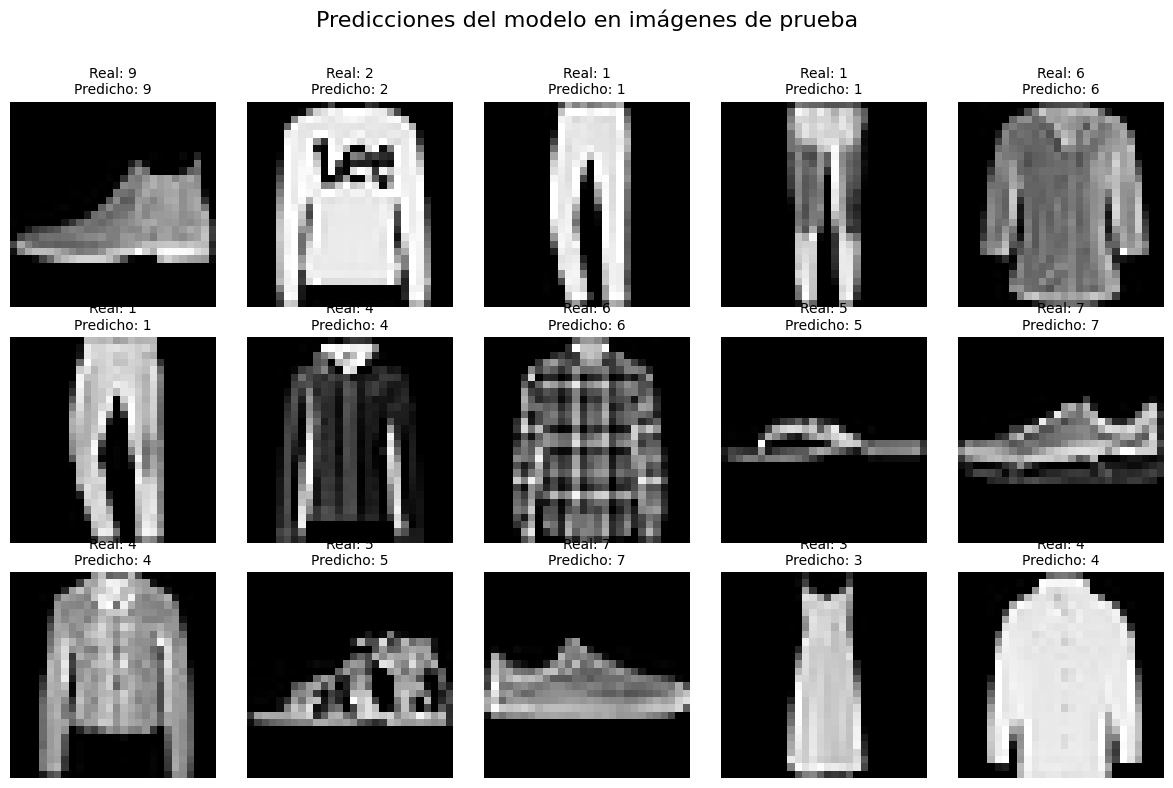

In [ ]:
import matplotlib.pyplot as plt

# Obtén las predicciones del modelo y las etiquetas reales
images, labels = next(iter(test_loader))  # Un lote de datos
model.eval()
with torch.no_grad():
    output = model(images)
    _, predicted = torch.max(output, 1)

# Prepara un gráfico con varias imágenes
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.suptitle("Predicciones del modelo en imágenes de prueba", fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')  # Mostrar la imagen en escala de grises
    ax.set_title(f"Real: {labels[i].item()}\nPredicho: {predicted[i].item()}", fontsize=10)
    ax.axis('off')  # Oculta los ejes para mayor claridad

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Además de visualizar las predicciones, podemos trazar la pérdida del modelo a lo largo de las épocas para ver cómo evoluciona el entrenamiento y detectar si hay sobreajuste o un entrenamiento ineficiente.


Época 1/5, Pérdida: 0.2841
Época 2/5, Pérdida: 0.2699
Época 3/5, Pérdida: 0.2593
Época 4/5, Pérdida: 0.2459
Época 5/5, Pérdida: 0.2400


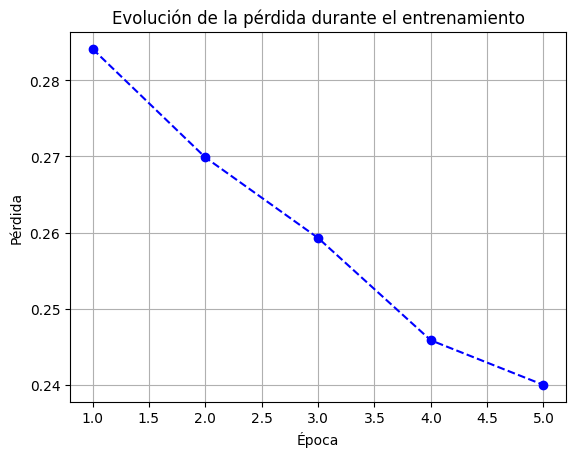

In [ ]:
# Registrar la pérdida por época (modificar el bucle de entrenamiento para almacenar estos valores)
train_losses = []

# Entrenamiento con registro
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))  # Guardar la pérdida promedio por época
    print(f"Época {epoch+1}/{epochs}, Pérdida: {running_loss/len(train_loader):.4f}")

# Gráfico de la pérdida
plt.plot(range(1, epochs + 1), train_losses, marker='o', linestyle='--', color='b')
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.grid()
plt.show()

### Comparación de Optimizadores: SGD vs Adam

En esta sección, exploraremos las diferencias entre los optimizadores: **SGD (Stochastic Gradient Descent)** y **Adam**, pues ambos tienen características únicas y son ampliamente utilizados en diferentes escenarios:

- **SGD**: Es un optimizador clásico que utiliza el promedio de gradientes calculados en cada minibatch para actualizar los pesos del modelo. Aunque es sencillo, su convergencia puede ser más lenta y menos estable.
- **Adam**: Es un optimizador más avanzado que combina técnicas como momentums y ajustes adaptativos del learning rate para acelerar la convergencia. Suele ser más eficiente en muchos casos prácticos.

Nuestro objetivo será comparar su desempeño al entrenar el mismo modelo sobre el dataset Fashion-MNIST. Evaluaremos la **evolución de la pérdida** durante el entrenamiento para observar cómo cada optimizador afecta la velocidad de convergencia y el rendimiento final del modelo.



Época 1/5, Pérdida: 0.2313
Época 2/5, Pérdida: 0.2217
Época 3/5, Pérdida: 0.2166
Época 4/5, Pérdida: 0.2060
Época 5/5, Pérdida: 0.2002


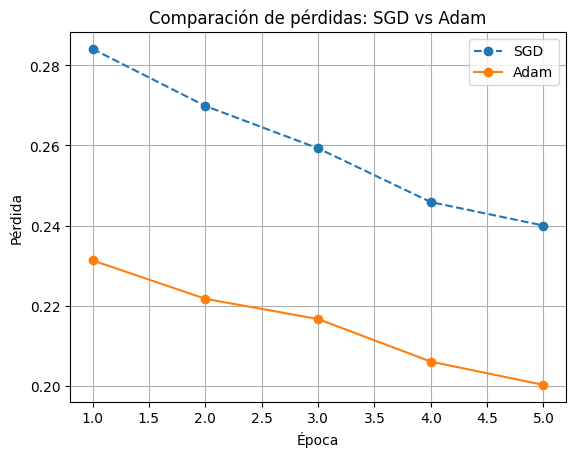

In [ ]:
# Cambiar optimizador a Adam
optimizer_adam = torch.optim.Adam(model.parameters(), lr=0.001)  # Configuramos Adam con un learning rate inicial

# Inicializar listas para guardar las pérdidas durante el entrenamiento
train_losses_adam = []  # Lista para almacenar las pérdidas de cada época al usar Adam

# Entrenamiento del modelo con Adam
for epoch in range(epochs):  # Iterar por cada época
    model.train()  # Cambiar el modelo al modo de entrenamiento
    running_loss = 0  # Reiniciar el acumulador de la pérdida para esta época
    for images, labels in train_loader:  # Iterar sobre cada lote de datos en el conjunto de entrenamiento
        optimizer_adam.zero_grad()  # Reiniciar los gradientes acumulados
        output = model(images)  # Forward pass: calcular la salida del modelo
        loss = criterion(output, labels)  # Calcular la pérdida entre la predicción y las etiquetas reales
        loss.backward()  # Backward pass: calcular los gradientes
        optimizer_adam.step()  # Actualizar los parámetros del modelo usando Adam
        running_loss += loss.item()  # Acumular la pérdida total para esta época
    train_losses_adam.append(running_loss / len(train_loader))  # Guardar la pérdida promedio de la época
    print(f"Época {epoch+1}/{epochs}, Pérdida: {train_losses_adam[-1]:.4f}")  # Mostrar pérdida en consola

# Comparación visual de pérdidas entre SGD y Adam
plt.plot(range(1, epochs + 1), train_losses, marker='o', linestyle='--', label="SGD")  # Pérdidas con SGD
plt.plot(range(1, epochs + 1), train_losses_adam, marker='o', linestyle='-', label="Adam")  # Pérdidas con Adam
plt.title("Comparación de pérdidas: SGD vs Adam")  # Título de la gráfica
plt.xlabel("Época")  # Etiqueta del eje X
plt.ylabel("Pérdida")  # Etiqueta del eje Y
plt.legend()  # Añadir leyenda para distinguir los optimizadores
plt.grid()  # Añadir rejilla para mejorar la legibilidad
plt.show()  # Mostrar la gráfica

### Interpretación de la Comparación entre SGD y Adam

Al observar la gráfica comparativa de la pérdida durante las épocas para los optimizadores **SGD** y **Adam**, podemos identificar lo siguiente:

1. **Velocidad de Convergencia:**
   - Adam muestra una convergencia más rápida en términos de reducción de pérdida. Desde las primeras épocas, la pérdida disminuye de manera más pronunciada en comparación con SGD.
   - SGD, aunque consistente, converge más lentamente, especialmente en los primeros pasos del entrenamiento.

2. **Estabilidad:**
   - Adam mantiene una reducción de pérdida más estable entre las épocas. Esto se debe a su mecanismo adaptativo que ajusta las tasas de aprendizaje basándose en los momentos acumulados.
   - SGD puede ser más sensible a la configuración del hiperparámetro de tasa de aprendizaje y, en este caso, parece necesitar más ajustes para alcanzar una convergencia similar a Adam.

3. **Precisión Final:**
   - Aunque Adam logra una pérdida ligeramente más baja al final de las épocas, ambos optimizadores alcanzan valores cercanos, lo que sugiere que la elección del optimizador puede depender de las necesidades específicas del modelo y los recursos disponibles.

---

### Conclusión

En este notebook:

- Implementamos y evaluamos dos de los optimizadores más populares en aprendizaje profundo: **SGD** y **Adam**.
- Observamos que Adam es una opción más rápida y estable para la mayoría de los problemas debido a su naturaleza adaptativa.
- Analizamos visualmente el rendimiento de ambos optimizadores utilizando el dataset **Fashion-MNIST**.


La elección del optimizador adecuado depende del problema en cuestión, el tiempo de entrenamiento disponible y los recursos computacionales. Aunque Adam es una excelente opción general, en algunos casos, SGD puede ser preferible por su simplicidad y capacidad de generalización cuando se ajustan adecuadamente sus hiperparámetros.

¡Ahora tienes una base sólida para entender y aplicar estos optimizadores en proyectos futuros!
